Berdasarkan problem statement yang telah ditentukan, maka akan dianalisa beberapa point berikut

1. Tren penjualan bulanan
2. Jumlah seller aktif setiap bulan
3. Distribusi penjualan setiap kota/wilayah
4. Banyak kategori berdasarkan produk yang terjual
5. Distribusi seller setiap kota



Missing values per column setelah penghapusan:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_

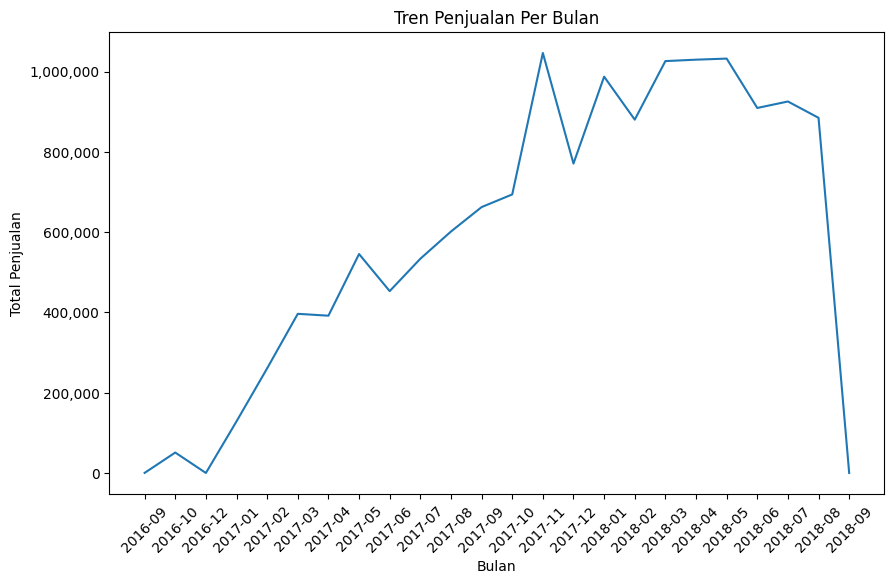

Penjualan tertinggi terjadi pada 2017-11 dengan total penjualan sebesar 1046127.84.
Penjualan terendah terjadi pada 2016-12 dengan total penjualan sebesar 10.90.


<ipython-input-6-3c3d3fb0f24a>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unique_customers, x='month', y='customer_unique_id', palette='viridis')


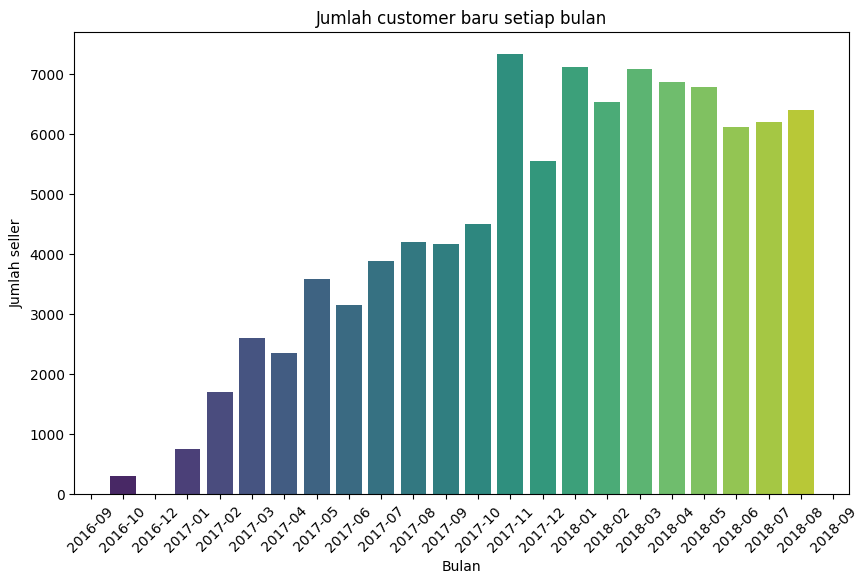

Bulan dengan jumlah customer baru terbanyak adalah 2017-11 dengan 7342 pembeli.
Bulan dengan jumlah customer baru paling sedikit adalah 2016-12 dengan 1 pembeli.


<ipython-input-6-3c3d3fb0f24a>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='customer_city', y='price', palette='rocket')


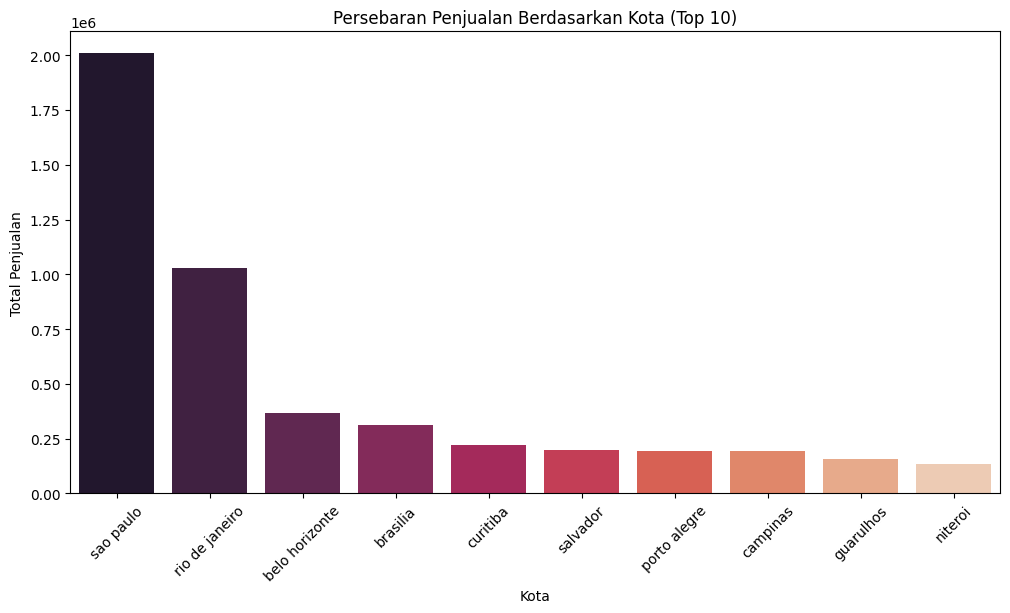

Kota-kota dengan total penjualan tertinggi adalah:
- sao paulo: Rp2008254.39
- rio de janeiro: Rp1030715.84
- belo horizonte: Rp366981.33
- brasilia: Rp312274.57
- curitiba: Rp218532.47
- salvador: Rp196675.55
- porto alegre: Rp195635.58
- campinas: Rp195626.49
- guarulhos: Rp155216.85
- niteroi: Rp132616.38


<ipython-input-6-3c3d3fb0f24a>:132: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


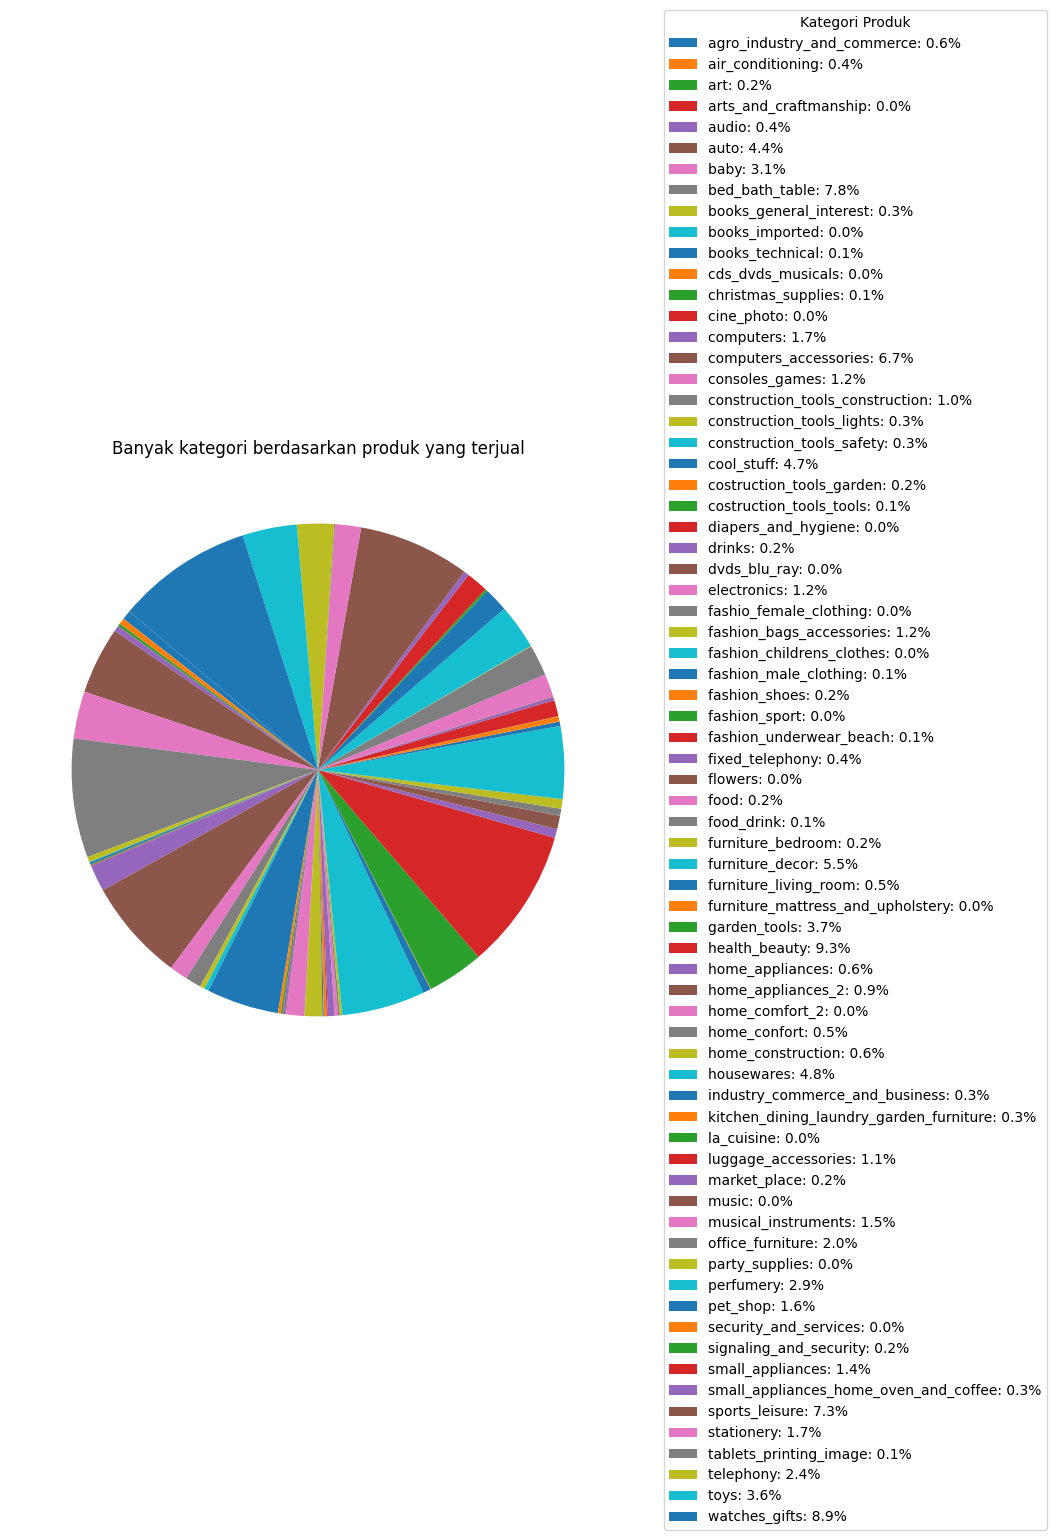

Kategori produk dengan banyaknya penjualan terbesar:
- health_beauty: 9.26% dari total penjualan.
- watches_gifts: 8.94% dari total penjualan.
- bed_bath_table: 7.80% dari total penjualan.
- sports_leisure: 7.31% dari total penjualan.
- computers_accessories: 6.72% dari total penjualan.


<ipython-input-6-3c3d3fb0f24a>:147: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_seller_cities, x='seller_city', y='seller_id', palette='coolwarm')


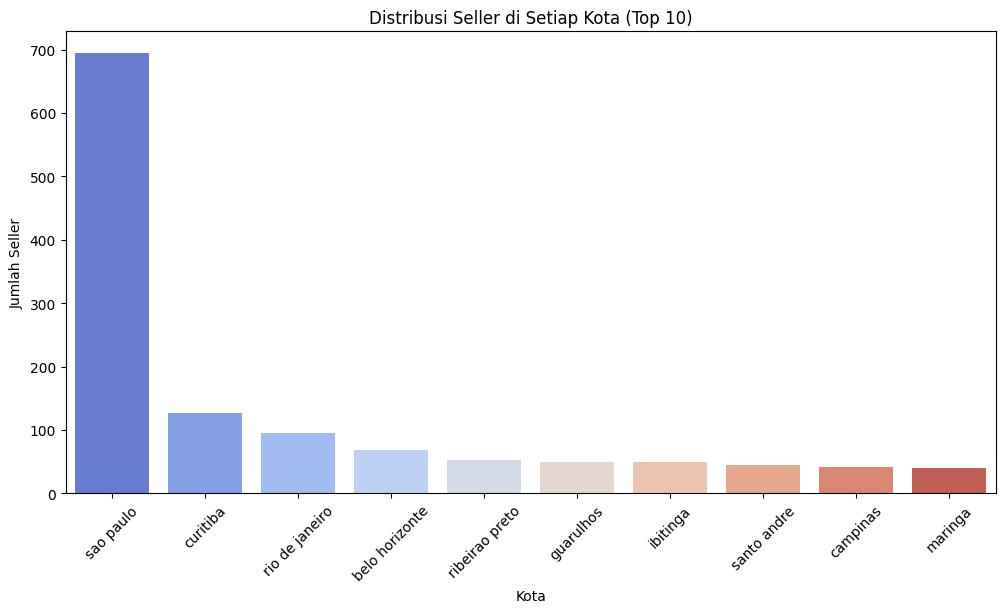

Kota-kota dengan jumlah seller terbanyak adalah:
- sao paulo: 694 seller.
- curitiba: 127 seller.
- rio de janeiro: 96 seller.
- belo horizonte: 68 seller.
- ribeirao preto: 52 seller.
- guarulhos: 50 seller.
- ibitinga: 49 seller.
- santo andre: 45 seller.
- campinas: 41 seller.
- maringa: 40 seller.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets (sesuaikan dengan lokasi file Anda)
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
category_translation = pd.read_csv('product_category_name_translation.csv')

#Data Preparation
order_data.dropna(inplace=True)

# Memeriksa kembali setelah menghapus missing values
missing_data = order_data.isnull().sum()
print(f"Missing values per column setelah penghapusan:\n{missing_data}")

# Memeriksa duplikasi
duplicate_rows = order_data.duplicated().sum()
print(f"Jumlah duplikasi: {duplicate_rows}")

# Menghapus duplikasi jika ditemukan
order_data.drop_duplicates(inplace=True)


# Gabungkan dataset
order_data = pd.merge(orders, order_items, on='order_id', how='inner')
order_data = pd.merge(order_data, customers, on='customer_id', how='inner')
order_data = pd.merge(order_data, payments, on='order_id', how='left')
order_data = pd.merge(order_data, products, on='product_id', how='left')
order_data = pd.merge(order_data, category_translation, on='product_category_name', how='left')
order_data = pd.merge(order_data, sellers, on='seller_id', how='left')

# Konversi kolom waktu
order_data['order_purchase_timestamp'] = pd.to_datetime(order_data['order_purchase_timestamp'])
order_data['month'] = order_data['order_purchase_timestamp'].dt.to_period('M')

# 1. Analisis Tren Penjualan Per Bulan
monthly_sales = order_data.groupby('month').agg({'price': 'sum'}).reset_index()

# Convert 'month' column to string before plotting
monthly_sales['month'] = monthly_sales['month'].astype(str)

# Visualisasi dengan format ribuan
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='month', y='price')
plt.title('Tren Penjualan Per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)

# Menambahkan format ribuan pada sumbu Y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{x:,.0f}'))

plt.show()

# Interpretasi hasil
highest_month = monthly_sales.loc[monthly_sales['price'].idxmax()]
lowest_month = monthly_sales.loc[monthly_sales['price'].idxmin()]
print(f"Penjualan tertinggi terjadi pada {highest_month['month']} dengan total penjualan sebesar {highest_month['price']:.2f}.")
print(f"Penjualan terendah terjadi pada {lowest_month['month']} dengan total penjualan sebesar {lowest_month['price']:.2f}.")

# 2. Jumlah customer baru setiap bulan
unique_customers = order_data.groupby('month').agg({'customer_unique_id': 'nunique'}).reset_index()

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=unique_customers, x='month', y='customer_unique_id', palette='viridis')
plt.title('Jumlah customer baru setiap bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah seller')
plt.xticks(rotation=45)
plt.show()

# Interpretasi hasil
max_customers = unique_customers.loc[unique_customers['customer_unique_id'].idxmax()]
min_customers = unique_customers.loc[unique_customers['customer_unique_id'].idxmin()]
print(f"Bulan dengan jumlah customer baru terbanyak adalah {max_customers['month']} dengan {max_customers['customer_unique_id']} pembeli.")
print(f"Bulan dengan jumlah customer baru paling sedikit adalah {min_customers['month']} dengan {min_customers['customer_unique_id']} pembeli.")

# 3. Persebaran Penjualan Berdasarkan Kota
sales_by_city = order_data.groupby('customer_city').agg({'price': 'sum'}).reset_index()
top_cities = sales_by_city.sort_values(by='price', ascending=False).head(10)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x='customer_city', y='price', palette='rocket')
plt.title('Persebaran Penjualan Berdasarkan Kota (Top 10)')
plt.xlabel('Kota')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.show()

# Interpretasi hasil
print("Kota-kota dengan total penjualan tertinggi adalah:")
for index, row in top_cities.iterrows():
    print(f"- {row['customer_city']}: Rp{row['price']:.2f}")

# 4. Banyak kategori berdasarkan produk yang terjual
category_sales = order_data.groupby('product_category_name_english').agg({'price': 'sum'}).reset_index()
category_sales['proportion'] = (category_sales['price'] / category_sales['price'].sum()) * 100
top_categories = category_sales.sort_values(by='proportion', ascending=False).head(5)

# Visualisasi
labels = [
    f"{category}: {proportion:.1f}%"
    for category, proportion in zip(category_sales['product_category_name_english'], category_sales['proportion'])
]
# Plot pie chart tanpa label
plt.figure(figsize=(12, 8))
plt.pie(
    category_sales['proportion'],
    labels=None,  # Tidak ada label langsung di pie chart
    startangle=140
)

# Tambahkan legenda dengan label persentase
plt.legend(
    labels,
    bbox_to_anchor=(1.05, 0.5),  # Tempatkan di samping
    loc='center left',
    title="Kategori Produk"  # Tambahkan judul legenda (opsional)
)

plt.title('Banyak kategori berdasarkan produk yang terjual')
plt.tight_layout()
plt.show()


# Interpretasi hasil
print("Kategori produk dengan banyaknya penjualan terbesar:")
for index, row in top_categories.iterrows():
    print(f"- {row['product_category_name_english']}: {row['proportion']:.2f}% dari total penjualan.")

# 5. Distribusi Seller di Setiap Kota
seller_distribution = order_data.groupby('seller_city').agg({'seller_id': 'nunique'}).reset_index()
top_seller_cities = seller_distribution.sort_values(by='seller_id', ascending=False).head(10)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(data=top_seller_cities, x='seller_city', y='seller_id', palette='coolwarm')
plt.title('Distribusi Seller di Setiap Kota (Top 10)')
plt.xlabel('Kota')
plt.ylabel('Jumlah Seller')
plt.xticks(rotation=45)
plt.show()

# Interpretasi hasil
print("Kota-kota dengan jumlah seller terbanyak adalah:")
for index, row in top_seller_cities.iterrows():
    print(f"- {row['seller_city']}: {row['seller_id']} seller.")


#3 Insight Baru
1. Analisis Tren Penjualan Berdasarkan Metode Pembayaran
2. Identifikasi Produk dengan Margin Tertinggi
3. Analisis Waktu Pemesanan (hari dan jam) serta Pengaruhnya terhadap Penjualan


<ipython-input-67-3c182650ed3b>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='total_payment_value', y='payment_type', data=payment_sales_trend, palette='viridis')


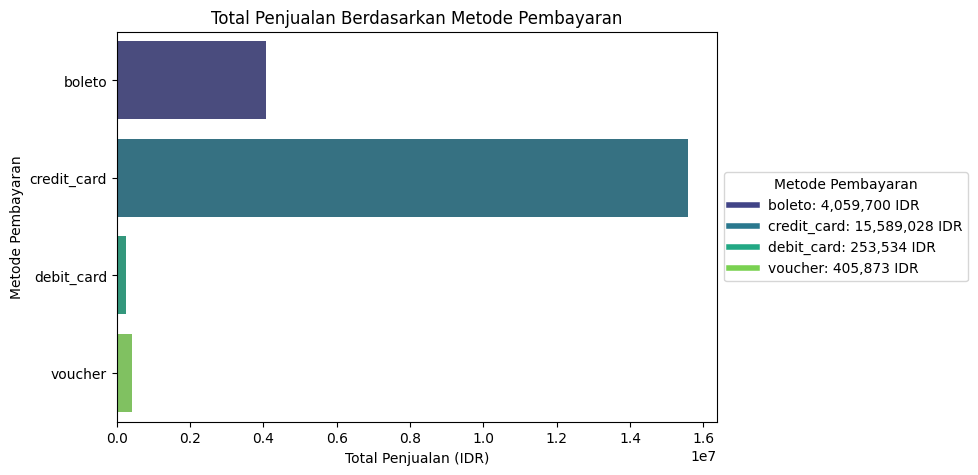

<ipython-input-67-3c182650ed3b>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='margin', y='product_id', data=top_margin_products, palette='plasma')


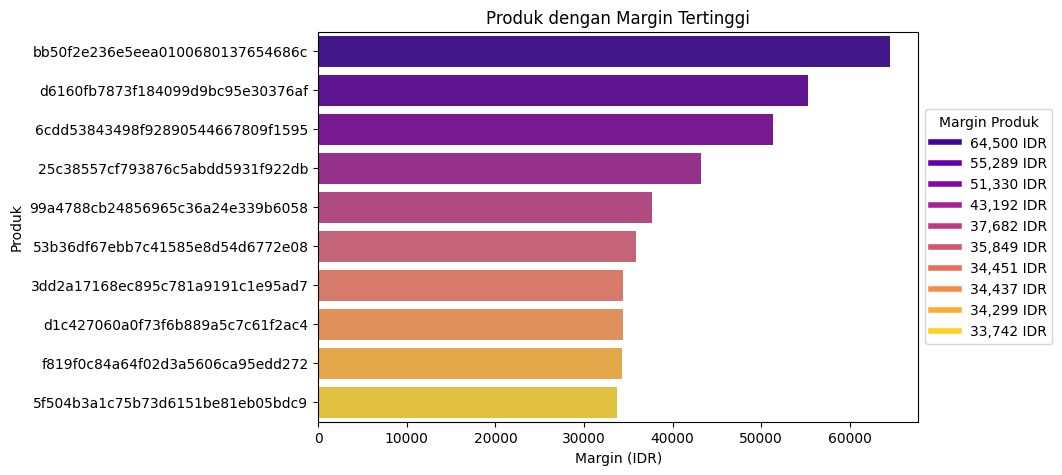

<ipython-input-67-3c182650ed3b>:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='order_weekday', y='order_id', data=weekday_sales, palette='coolwarm')


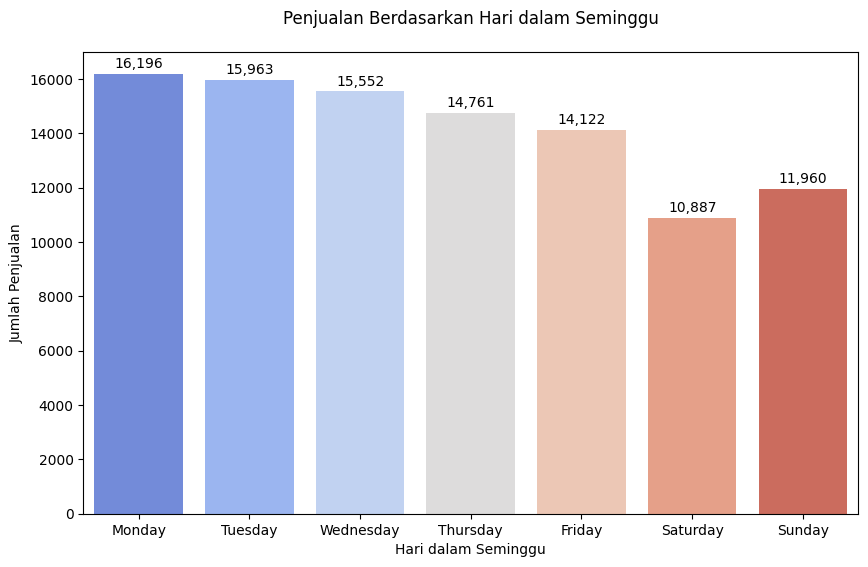

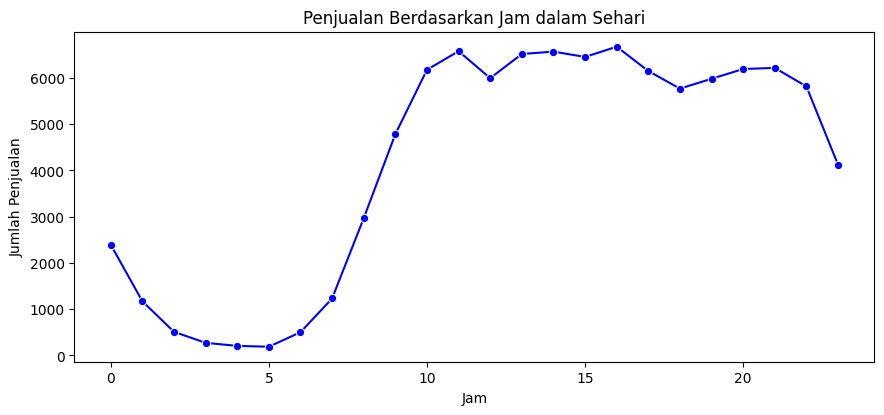

Jam 0: 2394 penjualan
Jam 1: 1170 penjualan
Jam 2: 510 penjualan
Jam 3: 272 penjualan
Jam 4: 206 penjualan
Jam 5: 188 penjualan
Jam 6: 502 penjualan
Jam 7: 1231 penjualan
Jam 8: 2967 penjualan
Jam 9: 4785 penjualan
Jam 10: 6177 penjualan
Jam 11: 6578 penjualan
Jam 12: 5995 penjualan
Jam 13: 6518 penjualan
Jam 14: 6569 penjualan
Jam 15: 6454 penjualan
Jam 16: 6675 penjualan
Jam 17: 6150 penjualan
Jam 18: 5769 penjualan
Jam 19: 5982 penjualan
Jam 20: 6193 penjualan
Jam 21: 6217 penjualan
Jam 22: 5816 penjualan
Jam 23: 4123 penjualan


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Membaca dataset yang telah diberikan
orders = pd.read_csv('olist_orders_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')

# 1. Analisis Tren Penjualan Berdasarkan Metode Pembayaran
# Menggabungkan orders dan order_payments berdasarkan order_id
payment_sales = pd.merge(orders, order_payments, on='order_id')

# Merge payment_sales dengan order_items untuk mendapatkan product_id
payment_sales = pd.merge(payment_sales, order_items, on='order_id')  # This line is added

# Menambahkan informasi harga produk
product_sales = pd.merge(payment_sales, products, on='product_id')

# Menghitung total penjualan per metode pembayaran
payment_sales['total_payment_value'] = payment_sales['payment_value']

# Menyusun data penjualan berdasarkan metode pembayaran
payment_sales_trend = payment_sales.groupby('payment_type')['total_payment_value'].sum().reset_index()

# Visualisasi tren penjualan berdasarkan metode pembayaran
plt.figure(figsize=(10,6))
ax = sns.barplot(x='total_payment_value', y='payment_type', data=payment_sales_trend, palette='viridis')

# Menambahkan judul dan label
plt.title('Total Penjualan Berdasarkan Metode Pembayaran')
plt.xlabel('Total Penjualan (IDR)')
plt.ylabel('Metode Pembayaran')

# Menambahkan legend di samping kanan grafik
# Membuat list nilai-nilai margin yang ingin ditampilkan di legend
legend_labels = payment_sales_trend['payment_type'].values
handles = [plt.Line2D([0], [0], color=sns.color_palette('viridis', len(legend_labels)).as_hex()[i], lw=4) for i in range(len(legend_labels))]

# Menambahkan legend dengan nilai margin
ax.legend(handles, legend_labels, title="Metode Pembayaran", loc='center left', bbox_to_anchor=(1, 0.5))

# Menambahkan jarak antara chart dan teks
plt.subplots_adjust(left=0.2, right=0.8, top=0.85, bottom=0.2)

plt.show()



# 2. Identifikasi Produk dengan Margin Tertinggi
# Menghitung margin (harga jual - harga produk) dan mengelompokkan produk berdasarkan margin tertinggi
product_sales['margin'] = product_sales['price'] - product_sales['freight_value']
top_margin_products = product_sales.groupby('product_id')['margin'].sum().reset_index().sort_values(by='margin', ascending=False)

# Menampilkan 10 produk dengan margin tertinggi
top_margin_products = top_margin_products.head(10)

# Visualisasi produk dengan margin tertinggi
plt.figure(figsize=(10,6))
ax = sns.barplot(x='margin', y='product_id', data=top_margin_products, palette='plasma')

# Menambahkan judul dan label
plt.title('Produk dengan Margin Tertinggi')
plt.xlabel('Margin (IDR)')
plt.ylabel('Produk')


# Menambahkan legend di samping kanan grafik
# Membuat list nilai-nilai margin yang ingin ditampilkan di legend
margin_values = top_margin_products['margin'].values

# Membuat handles dengan warna yang sesuai dari palet 'plasma'
handles = [plt.Line2D([0], [0], color=sns.color_palette('plasma', len(margin_values))[i], lw=4)
           for i, value in enumerate(margin_values)]
labels = [f'{value:,.0f} IDR' for value in margin_values]

# Menambahkan legend dengan nilai margin
ax.legend(handles, labels, title="Margin Produk", loc='center left', bbox_to_anchor=(1, 0.5))

# Menyesuaikan margin agar legend tidak menutup grafik
plt.subplots_adjust(left=0.2, right=0.8, top=0.85, bottom=0.2)

# Menampilkan plot
plt.show()


# 3. Analisis Penjualan Berdasarkan Hari dalam Seminggu
# Mengonversi tanggal pemesanan
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_weekday'] = orders['order_purchase_timestamp'].dt.day_name()

# Menghitung penjualan per hari dalam seminggu
weekday_sales = orders.groupby('order_weekday')['order_id'].count().reset_index()
weekday_sales = weekday_sales.set_index('order_weekday').reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

# Visualisasi penjualan berdasarkan hari dalam seminggu
plt.figure(figsize=(10,6))
ax = sns.barplot(x='order_weekday', y='order_id', data=weekday_sales, palette='coolwarm')

# Menambahkan judul dan label
plt.title('Penjualan Berdasarkan Hari dalam Seminggu', pad=20)
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penjualan')

# Menambahkan label di atas setiap bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 100,  # Menambahkan jarak vertikal 100
            f'{p.get_height():,.0f}',  # Format label sebagai angka dengan pemisah ribuan
            horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=10)

for p in ax.patches:
    p.set_edgecolor('none')

# Menampilkan plot
plt.show()


# 4. Analisis Penjualan Berdasarkan Jam dalam Sehari
# Mengonversi tanggal pemesanan dan tanggal pengiriman
orders['order_purchase_hour'] = orders['order_purchase_timestamp'].dt.hour
hourly_sales = orders.groupby('order_purchase_hour')['order_id'].count().reset_index()

# Visualisasi penjualan per jam
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='order_purchase_hour', y='order_id', data=hourly_sales, marker='o', color='blue')
plt.title('Penjualan Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penjualan')

# Menambahkan jarak antara chart dan teks
plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.3)

# Menampilkan grafik
plt.show()

# Menampilkan hasil analisis
for index, row in hourly_sales.iterrows():
    print(f"Jam {row['order_purchase_hour']}: {row['order_id']} penjualan")
